![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Face Mask Prediction using U-Net
Task is to predict the mask around the face in a given image.

# Instructions
- Some part of the code is already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

## Dataset
Faces in images marked with bounding boxes. Have around 409 images with around 1000 faces manually tagged via bounding box.
- Data file name: images.npy

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [3]:
import numpy as np
data = np.load("/content/drive/My Drive/images.npy", allow_pickle = True)

### Check one sample from the loaded "images.npy" file  (2 marks)
- Hint: print data[10][1] 

In [4]:
print(data.shape)
sample_id = 11
print(data[sample_id].shape)
print(type(data[sample_id][0]))
print(type(data[sample_id][1]))
print(data[sample_id][0].shape)
print(data[sample_id][1])

(409, 2)
(2,)
<class 'numpy.ndarray'>
<class 'list'>
(960, 648, 3)
[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.046296296296296294, 'y': 0.16354166666666667}, {'x': 0.2037037037037037, 'y': 0.2989583333333333}], 'imageWidth': 648, 'imageHeight': 960}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.3194444444444444, 'y': 0.1375}, {'x': 0.5570987654320988, 'y': 0.29583333333333334}], 'imageWidth': 648, 'imageHeight': 960}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.5648148148148148, 'y': 0.1875}, {'x': 0.7145061728395061, 'y': 0.30520833333333336}], 'imageWidth': 648, 'imageHeight': 960}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.7160493827160493, 'y': 0.209375}, {'x': 0.8333333333333334, 'y': 0.30625}], 'imageWidth': 648, 'imageHeight': 960}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.8225308641975309, 'y': 0.23125}, {'x': 0.9429012345679012, 'y': 0.3177083333333333}], 'imageWidth': 648, 'imageHeight': 960}]


### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [5]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X" array
- Masks will be stored in "masks" array

In [6]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Split the data into training and testing (2 marks)
- 400 images in training
- 9 images in testing data

Training data

In [7]:
X_train = X[0:400]
y_train = masks[0:400]

Testing data

In [8]:
X_test = X[400:409]
y_test = masks[400:409]

### Print a sample training image, image array and its mask (2 marks)

Print the image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.53725493 -0.71764708 -0.81176472]
  [-0.56078434 -0.73333335 -0.83529413]
  [-0.54509807 -0.71764708 -0.80392158]
  ...
  [-0.52156866 -0.69411767 -0.78039217]
  [-0.51372552 -0.68627453 -0.77254903]
  [-0.56078434 -0.73333335 -0.81960785]]

 [[-0.57647061 -0.71764708 -0.82745099]
  [-0.59215689 -0.73333335 -0.84313726]
  [-0.56862748 -0.70980394 -0.80392158]
  ...
  [-0.56078434 -0.73333335 -0.81960785]
  [-0.5529412  -0.72549021 -0.81176472]
  [-0.53725493 -0.70980394 -0.79607844]]

 [[-0.58431375 -0.72549021 -0.83529413]
  [-0.62352943 -0.77254903 -0.88235295]
  [-0.57647061 -0.71764708 -0.81176472]
  ...
  [-0.54509807 -0.71764708 -0.80392158]
  [-0.51372552 -0.68627453 -0.77254903]
  [-0.52941179 -0.7019608  -0.78823531]]

 ...

 [[-0.38039213 -0.64705884 -0.8509804 ]
  [-0.372549   -0.63921571 -0.84313726]
  [-0.33333331 -0.60000002 -0.81176472]
  ...
  [-0.41176468 -0.47450978 -0.59215689]
  [-0.39607841 -0.47450978 -0.56862748]
  [-0.41176468 -0.48235291 -0.56862748]]

 [

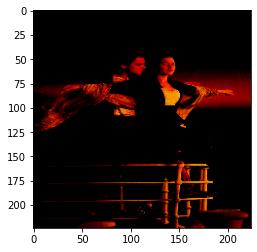

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[30])
print(X_train[30])

Print the mask

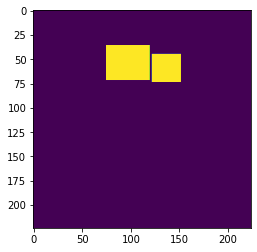

In [10]:
#plt.xlim(0, 30)
#plt.ylim(30, 0)
plt.imshow(y_train[30])

## Create the model (5 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [11]:
import tensorflow
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable
  
    block2 = model.get_layer("conv1_relu").output
    block3 = model.get_layer("conv_pw_2_relu").output
    block4 = model.get_layer("conv_pw_5_relu").output
    block5 = model.get_layer("conv_pw_11_relu").output
    block6 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block6), block5])
    x = Concatenate()([UpSampling2D()(x), block4])
    x = Concatenate()([UpSampling2D()(x), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = UpSampling2D()(x)

    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)

    return Model(inputs=model.input, outputs=x)

### Call the create_model function (1 mark)
- Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)

In [12]:
model = create_model(False)

17227776/17225924 [==============================] - 0s 0us/step


### Print model summary (1 mark)

In [13]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_______________________________________________________________________________________

### Define dice coefficient function (2 marks)
- Create a function to calculate dice coefficient


In [14]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())

### Define loss function (2 marks)

In [15]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tensorflow.keras.backend.log(dice_coefficient(y_true, y_pred) + tensorflow.keras.backend.epsilon())

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define callbacks (2 marks)
- Use ModelCheckpoint
- Use EarlyStopping
- Use ReduceLROnPlateau

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, save_best_only=True, save_weights_only=True)

stop = EarlyStopping(monitor="val_loss", patience=5)

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1)

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: use the callbacks defined above

In [18]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=10, batch_size=1, verbose=1)

Epoch 1/10
400/400 [==============================] - 10s 25ms/step - loss: 1.8855 - dice_coefficient: 0.2904 - val_loss: 1.2625 - val_dice_coefficient: 0.3839
Epoch 2/10
400/400 [==============================] - 10s 24ms/step - loss: 1.2091 - dice_coefficient: 0.4371 - val_loss: 0.9937 - val_dice_coefficient: 0.4763
Epoch 3/10
400/400 [==============================] - 10s 24ms/step - loss: 1.0496 - dice_coefficient: 0.4936 - val_loss: 0.8987 - val_dice_coefficient: 0.5130
Epoch 4/10
400/400 [==============================] - 10s 24ms/step - loss: 0.9769 - dice_coefficient: 0.5236 - val_loss: 0.8549 - val_dice_coefficient: 0.5329
Epoch 5/10
400/400 [==============================] - 10s 24ms/step - loss: 0.9370 - dice_coefficient: 0.5420 - val_loss: 0.8325 - val_dice_coefficient: 0.5436
Epoch 6/10
400/400 [==============================] - 10s 25ms/step - loss: 0.9085 - dice_coefficient: 0.5542 - val_loss: 0.8064 - val_dice_coefficient: 0.5528
Epoch 7/10
400/400 [====================

### Get the predicted mask for a test image   (2 marks)

Show the test image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


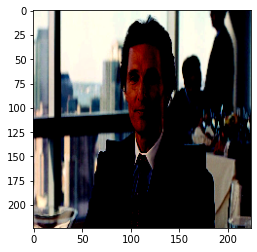

In [29]:
test_id = 3
plt.imshow(X_test[test_id])

Show original mask for test image

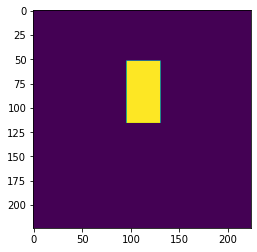

In [30]:
plt.imshow(y_test[test_id])

Predict the mask on the test image

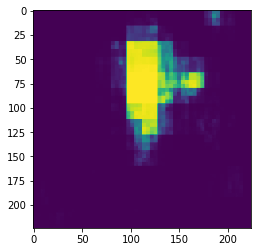

In [50]:
predicted = model.predict(np.reshape(X_test[test_id], [1, IMAGE_HEIGHT, IMAGE_WIDTH, 3]))
plt.imshow(predicted[0])

### Impose the mask on the test image (2 marks)
- In imshow use the alpha parameter and set it to greater than 0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


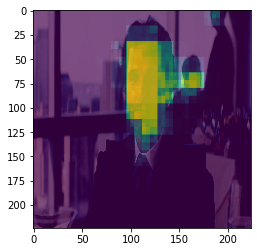

In [52]:
_, ax = plt.subplots(1)
ax.imshow(X_test[test_id])
ax.imshow(predicted[0], alpha = .7)